1. csv 폴더에서 Sales Records.csv 파일 로드 
2. 'Order ID', 'Total Revenue', 'Total Cost', 'Total Profit', 'Sales Channel' 컬럼을 제거 
3. 컬럼의 이름들을 변경 -> ['대륙', '국가', '상품종류', '우선순위', '주문일자', '발송일자', '판매개수', '단가', '원가']
4. 데이터의 결측치가 존재하는가?
5. 대륙, 국가를 기준으로 오름차순 정렬 
6. 인덱스를 재지정(기존의 인덱스를 제거)
7. 새로운 파생변수 생성 
    - 총단가 : 판매개수 * 단가
    - 총원가 : 판매개수 * 원가
    - 총이윤 : 총단가 - 총원가

In [1]:
import pandas as pd

In [2]:
# Sales Records.csv 파일을 로드 
# 상위로 이동(../) -> 상위로 이동(../) 
# -> csv 하위폴더이동(csv/) -> Sales Records.csv
sales = pd.read_csv('../../csv/Sales Records.csv')

In [3]:
sales.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06


In [4]:
## 특정 컬럼을 제거 
sales.drop(
    ['Order ID','Total Revenue', 'Total Cost', 
     'Total Profit', 'Sales Channel'], 
    axis=1, 
    inplace = True
)

In [5]:
# 컬럼의 이름을 변경 
sales.columns = ['대륙', '국가', '상품종류', '우선순위', 
                 '주문일자', '발송일자', '판매개수', 
                 '단가', '원가']

In [6]:
sales.head(1)

,대륙,국가,상품종류,우선순위,주문일자,발송일자,판매개수,단가,원가
0,Sub-Saharan Africa,Chad,Office Supplies,L,1/27/2011,2/12/2011,4484,651.21,524.96


In [7]:
## 결측치를 확인
## 데이터프레임의 정보를 출력 
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대륙      10000 non-null  object 
 1   국가      10000 non-null  object 
 2   상품종류    10000 non-null  object 
 3   우선순위    10000 non-null  object 
 4   주문일자    10000 non-null  object 
 5   발송일자    10000 non-null  object 
 6   판매개수    10000 non-null  int64  
 7   단가      10000 non-null  float64
 8   원가      10000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 703.2+ KB


In [8]:
## 통계요약정보를 출력 
sales.describe()

,판매개수,단가,원가
count,10000.000000,10000.000000,10000.000000
mean,5002.855900,268.143139,188.806639
std,2873.246454,217.944092,176.445907
min,2.000000,9.330000,6.920000
25%,2530.750000,109.280000,56.670000
50%,4962.000000,205.700000,117.110000
75%,7472.000000,437.200000,364.690000
max,10000.000000,668.270000,524.960000


In [9]:
## 컬럼별 결측치의 개수를 출력 
sales.isna().sum()

대륙      0
국가      0
상품종류    0
우선순위    0
주문일자    0
발송일자    0
판매개수    0
단가      0
원가      0
dtype: int64

In [10]:
## 데이터를 백업 
df = sales.copy()

In [11]:
df.head(1)

,대륙,국가,상품종류,우선순위,주문일자,발송일자,판매개수,단가,원가
0,Sub-Saharan Africa,Chad,Office Supplies,L,1/27/2011,2/12/2011,4484,651.21,524.96


In [12]:
# 오름차순 정렬 ( 기준이 되는 데이터가 2개 [대륙, 국가])
df.sort_values(
    ['대륙', '국가'], 
    inplace = True
)

In [13]:
# 인덱스를 초기화 (기존의 인덱스는 제거)
df.reset_index(drop=True, inplace=True)

In [14]:
## 3개의 파생변수를 생성
## 총단가 = 판매개수 * 단가
df['총단가'] = df['판매개수'] * df['단가']
df.head(3)

,대륙,국가,상품종류,우선순위,주문일자,발송일자,판매개수,단가,원가,총단가
0,Asia,Bangladesh,Personal Care,L,12/11/2016,1/13/2017,9420,81.73,56.67,769896.60
1,Asia,Bangladesh,Cosmetics,M,7/29/2010,9/11/2010,577,437.20,263.33,252264.40
2,Asia,Bangladesh,Vegetables,C,4/28/2014,5/5/2014,34,154.06,90.93,5238.04


In [15]:
## 총원가 = 판매개수 * 원가
df['총원가'] = df['판매개수'] * df['원가']
## 총이윤 = 총단가 - 총원가
## 총이윤 = (단가 - 원가) * 판매개수
df['총이윤'] = df['총단가'] - df['총원가']

In [16]:
df.head()

,대륙,국가,상품종류,우선순위,주문일자,발송일자,판매개수,단가,원가,총단가,총원가,총이윤
0,Asia,Bangladesh,Personal Care,L,12/11/2016,1/13/2017,9420,81.73,56.67,769896.60,533831.40,236065.20
1,Asia,Bangladesh,Cosmetics,M,7/29/2010,9/11/2010,577,437.20,263.33,252264.40,151941.41,100322.99
2,Asia,Bangladesh,Vegetables,C,4/28/2014,5/5/2014,34,154.06,90.93,5238.04,3091.62,2146.42
3,Asia,Bangladesh,Cereal,L,6/22/2010,6/28/2010,9768,205.70,117.11,2009277.60,1143930.48,865347.12
4,Asia,Bangladesh,Office Supplies,H,3/20/2013,4/11/2013,7731,651.21,524.96,5034504.51,4058465.76,976038.75


1. 대륙별 총이윤의 합이 가장 높은 대륙은 어디인가?
2. 국가별 총이윤의 함이 가장 높은 상위 10개의 국가는 어디인가?
3. 어떤 상품이 가장 많이 팔렸을까?

In [17]:
# 대륙별 총이윤 합
# 대륙별로 그룹화 
# 그룹화 함수 : groupby( [기준이되는 컬럼] )
# case1 : 전체 데이터프레임에서 그룹화 -> 컬럼을 필터링
df.groupby(
    ['대륙']
).sum()[ ['총이윤'] ]

,총이윤
대륙,
Asia,5.874033e+08
Australia and Oceania,3.240712e+08
Central America and the Caribbean,4.033578e+08
Europe,1.027000e+09
Middle East and North Africa,5.099239e+08
North America,9.949552e+07
Sub-Saharan Africa,9.996421e+08


In [18]:
# case2 : 전체 데이터프레임에서 컬럼을 필터링 -> 그룹화
group_data = \
      df[ ['대륙', '총이윤'] ].groupby(['대륙']).sum()

In [19]:
group_data.sort_values(['총이윤'], ascending=False)

,총이윤
대륙,
Europe,1.027000e+09
Sub-Saharan Africa,9.996421e+08
Asia,5.874033e+08
Middle East and North Africa,5.099239e+08
Central America and the Caribbean,4.033578e+08
Australia and Oceania,3.240712e+08
North America,9.949552e+07


In [20]:
## 어떤 국가가 과연 가장 많은 이윤을 내는가?
## 상위의 10개의 국가를 확인
group_data2 =\
      df[ ['국가', '총이윤'] ].groupby(['국가']).sum()


In [21]:
group_data2.sort_values(
    ['총이윤'], 
    ascending=False, 
    inplace=True
)

In [22]:
group_data2.head(10)

,총이윤
국가,
Kiribati,32454798.26
Qatar,30861356.79
Grenada,30302769.90
Taiwan,30044779.98
Malawi,29329125.05
Botswana,29019726.67
Bangladesh,28092720.77
Lithuania,28063374.02
Burundi,27911293.45


In [23]:
## 과연 한국의 등수는 몇등일까?
## case1 : index는 list임으로 list 내장함수(index())를 이용
indexs = list(group_data2.index)
indexs.index('South Korea') + 1

48

In [24]:
# case2 : 인덱스를 초기화 (기존의 인덱스를 보존)
group_data3 = group_data2.reset_index()
group_data3.loc[
    group_data3['국가'] == 'South Korea'
]

,국가,총이윤
47,South Korea,23893933.75


In [25]:
## 어떠한 상품 종류가 많이 팔렸는가?

# 그룹화 연산 
group_data4 = \
df[ ['상품종류', '판매개수'] ].groupby(['상품종류']).sum()

In [26]:
group_data4.sort_values(['판매개수'], ascending= False)

,판매개수
상품종류,
Personal Care,4402827
Clothes,4352350
Household,4336803
Vegetables,4238098
Cereal,4203394
Baby Food,4197006
Snacks,4122781
Office Supplies,4120263
Cosmetics,4103290


In [27]:
# 그룹화를 할 컬럼이 2개 이상인 경우
# 그룹화 연산도 2개 이상인 경우
df[
    ['국가', '상품종류', '판매개수']
].groupby(
    ['국가', '상품종류']
).agg(['sum', 'count'])

판매개수      
                               sum count
국가          상품종류                        
Afghanistan Baby Food         1368     1
            Beverages        14380     3
            Cereal           54917     9
            Clothes          29887     5
            Cosmetics        12177     4
...                            ...   ...
Zimbabwe    Meat              9640     1
            Office Supplies  17447     4
            Personal Care    18478     2
            Snacks           16314     3
            Vegetables       33945     5

[2198 rows x 2 columns]

In [38]:
## pivot_table()
## pandas 에 내장된 함수
pivot_data = pd.pivot_table(
    df, 
    index= '대륙', 
    values= '총이윤', 
    aggfunc= 'sum', 
    margins= True, 
    fill_value= 0
)

In [39]:
pivot_data

,총이윤
대륙,
Asia,5.874033e+08
Australia and Oceania,3.240712e+08
Central America and the Caribbean,4.033578e+08
Europe,1.027000e+09
Middle East and North Africa,5.099239e+08
North America,9.949552e+07
Sub-Saharan Africa,9.996421e+08
All,3.950893e+09


<AxesSubplot: xlabel='대륙'>

C:\Users\moons\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
C:\Users\moons\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47449 (\N{HANGUL SYLLABLE RYUG}) missing from current font.
  func(*args, **kwargs)
C:\Users\moons\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\moons\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
C:\Users\moons\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50980 (\N{HANGUL SYLLABLE YUN}) missing from current font.
  func(*args, **kwargs)
C:\Users\moons\AppData\Roaming\Python\Python3

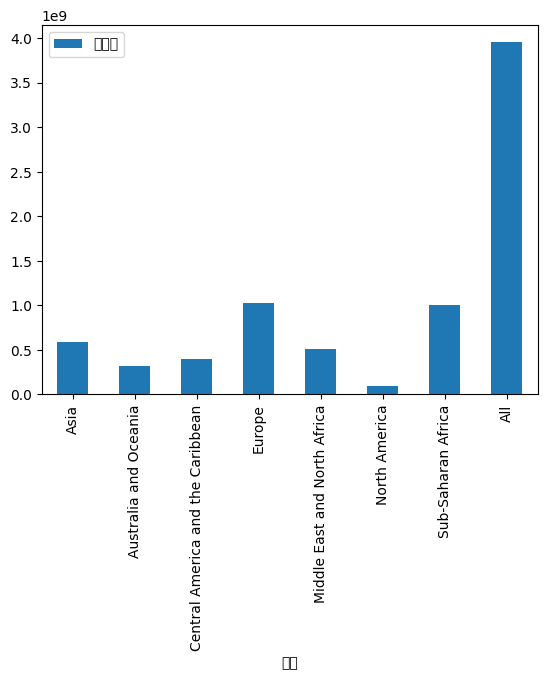

In [29]:
pivot_data.plot(kind='bar')

<AxesSubplot: xlabel='대륙'>

C:\Users\moons\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
C:\Users\moons\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47449 (\N{HANGUL SYLLABLE RYUG}) missing from current font.
  func(*args, **kwargs)
C:\Users\moons\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\moons\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
C:\Users\moons\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50980 (\N{HANGUL SYLLABLE YUN}) missing from current font.
  func(*args, **kwargs)
C:\Users\moons\AppData\Roaming\Python\Python3

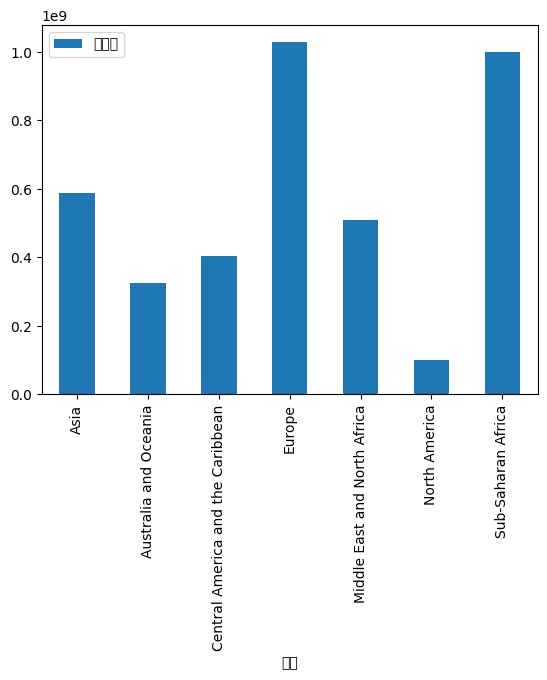

In [30]:
group_data.plot(kind='bar')

In [31]:
import matplotlib.pyplot as plt

In [32]:
group_data2.loc['South Korea', '총이윤']

23893933.75

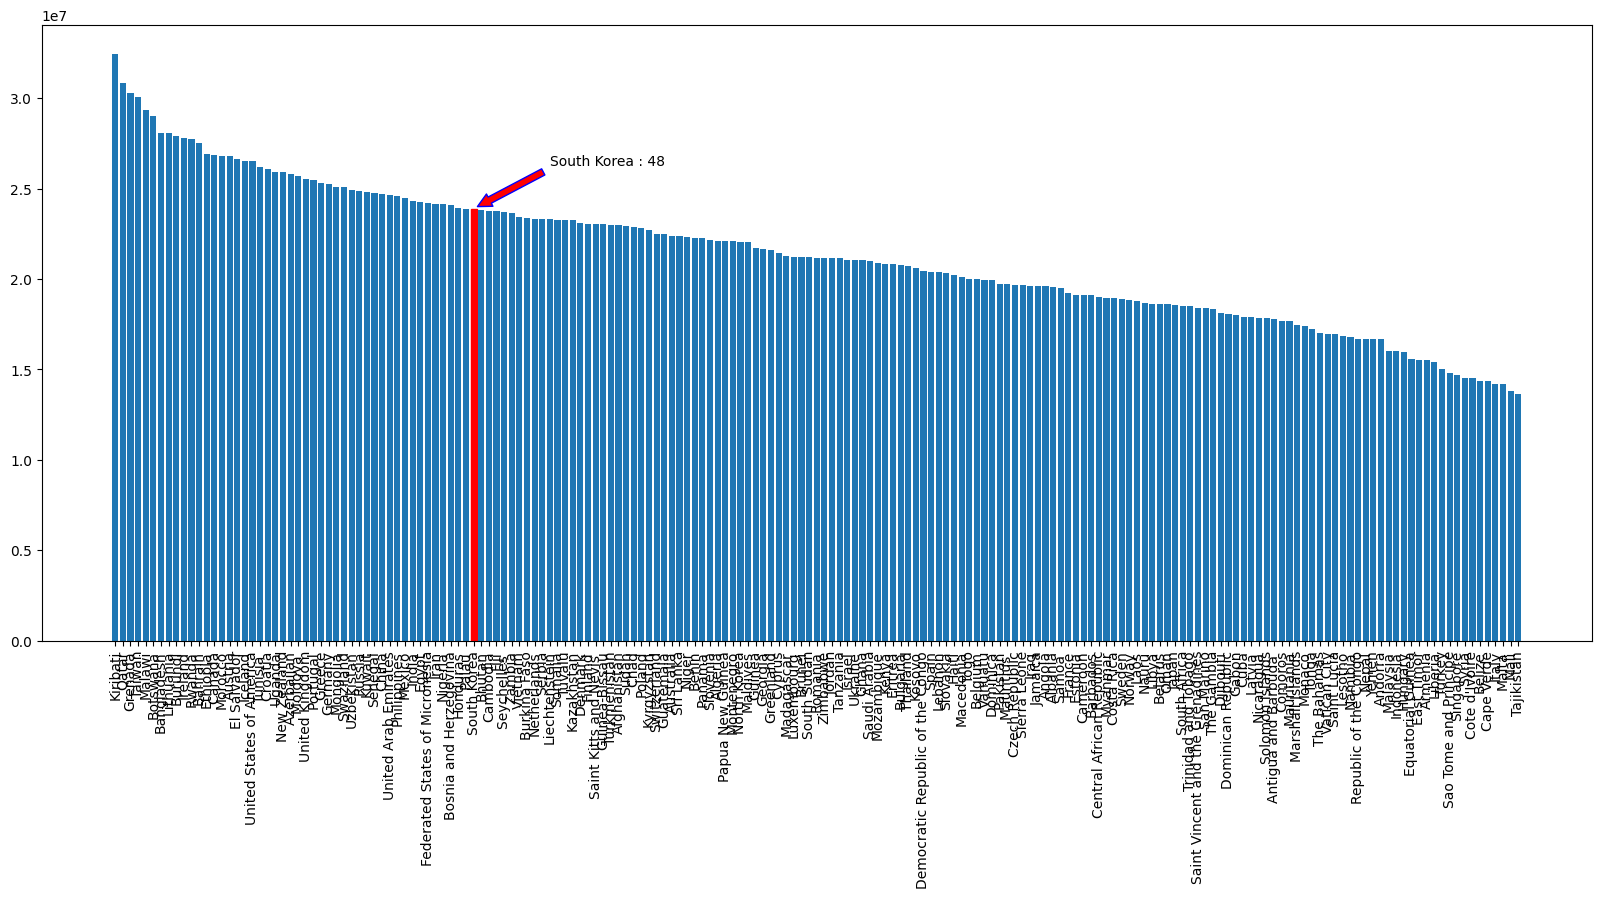

In [33]:
## group_data2를 가지고 그래프 생성
# 막대 그래프 생성 
x = group_data2.index
y = group_data2['총이윤']

korea_rank = list(group_data2.index).index('South Korea')
korea_value = group_data2.loc['South Korea', '총이윤']

# 그래프의 사이즈를 변경
plt.figure(figsize=(20, 8))
graph = plt.bar(x, y)
graph[korea_rank].set_color('r')
# x축의 데이터들을 회전 
plt.xticks(rotation = 90)

# 그래프에 주석을 추가 
plt.annotate(
    f"South Korea : {korea_rank + 1}", 
    xy = (korea_rank, korea_value),     # 화살표가 지정되는 좌표
    xytext = (korea_rank + 10, korea_value * 1.1),  # 주석의 좌표
    arrowprops= {
        'facecolor' : 'r',  # 화살표 내부의 색을 지정
        'edgecolor' : 'b',  # 화살표 테두리의 색을 지정
        'headwidth' : 10,   # 화살표 머리의 너비 
        'headlength' : 10,  # 화살표 머리의 길이
        'width' : 5,        # 화살표 꼬리의 너비 
        'shrink' : 0.05     # 화살표와 주석의 거리 
    }
)

plt.show()